# Results from Google Big Query: HackerNews
## https://bigquery.cloud.google.com/table/bigquery-public-data:hacker_news.full_201510
## https://github.com/HackerNews/API for fields definition

In [1]:
import pandas as pd

df = pd.read_csv('/Users/jheng32/Desktop/GA/Project_GA/hn_story.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
by             10000 non-null object
score          10000 non-null int64
time           10000 non-null int64
title          10000 non-null object
type           10000 non-null object
url            279 non-null object
text           10000 non-null object
parent         0 non-null float64
deleted        0 non-null float64
dead           1849 non-null object
descendants    8151 non-null float64
id             10000 non-null int64
ranking        0 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 781.3+ KB


# Cleaning of Data

In [2]:
#deleted, ranking are all null. drop those columns.
df.drop(['deleted', 'ranking','parent'], axis=1,inplace = True)

#type and url are irrelevant to predict scores
df.drop(['type', 'url'], axis = 1, inplace = True)

#time is in unix, change it to mm/dd/yy hh:mm:ss 
df=df.set_index(pd.to_datetime(df['time'], unit='s'))

#dead is boolean. those null = False. transform it to 1 and 0
df['dead'].fillna(value=False, inplace  = True)
df[['dead']]=df[['dead']].astype(int)

#assume descendants null = 0
df['descendants'].fillna(value =0, inplace =True)
 
#get_dummies for type: job, poll, story
#type_dum =pd.get_dummies(df['type'], drop_first =True)
#df=pd.concat([df,type_dum], axis=1)
#df = df.sort_index()

#map each type to numeric
#df['type_numeric']= df['type'].map({'job' :0,'story':1, 'poll':2})

#add len of text to part of df
df['text_length'] = df['text'].str.len()

#len of title
df['title_length'] = df['title'].str.len()

#creating column for hour when story is posted
df['post_hour'] = pd.DatetimeIndex(df.index).hour
df['post_hour'].fillna(value = df['post_hour'].mean(), inplace = True)
df['post_day'] = pd.DatetimeIndex(df.index).dayofweek #0 for monday
df['post_day'].fillna(value = df['post_day'].mean(), inplace = True)

#drop unix time
df.drop(['time'],axis = 1, inplace = True)

In [3]:
df.head()

,by,score,title,text,dead,descendants,id,text_length,title_length,post_hour,post_day
time,,,,,,,,,,,
2015-10-13 06:57:17,sliekasbekelniu,1,Ask HN: Could you recommend Computer basics co...,"Hi, there HN community,<p>there are a lot of p...",0,0.0,10378921,617,52,6,1
2015-10-13 06:49:29,hn-growth,4,Ask HN: Can you shed some light on calculating...,I&#x27;m looking for some help with growth rat...,0,0.0,10378901,1127,54,6,1
2015-10-13 04:49:37,throwaway321564,4,Ask HN: How to decide on Enterprise pricing,I have a saas app in the $12-$29&#x2F;month r...,0,2.0,10378603,504,43,4,1
2015-10-13 02:36:27,confImmigr,12,Ask HN: Is it okay to change jobs within a yea...,I&#x27;m a software developer and I&#x27;ve be...,0,6.0,10378252,749,60,2,1
2015-10-13 01:23:10,Oggle,2,Travel assistant on demand,What do you guys think of this? It&#x27;s an i...,0,0.0,10377894,243,26,1,1


# Visualisation

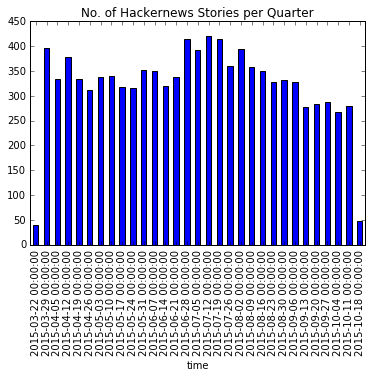

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#which Q period has the most hackernews - split by type
bar_chart=df['id'].groupby(pd.TimeGrouper("W")).count().plot(kind='bar', title='No. of Hackernews Stories per Quarter')
bar_chart.x_label = 'Date'
bar_chart.y_label = 'Quantity'
fig = bar_chart.get_figure()
fig.savefig('y.png')

Ignore the first and last week. Since I limit it to 10000, it is likely that number of stories on the first week got cut and the last week might not have been updated at time of query.

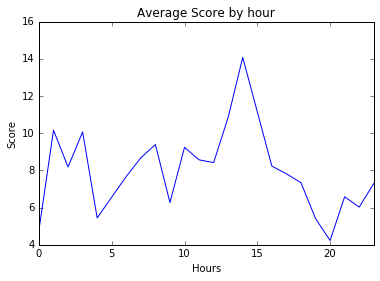

In [6]:
#which hour have the highest score
hour_chart = df['score'].groupby(df['post_hour']).mean().plot(kind ='line', title ='Average Score by hour')
hour_chart.set_xlabel('Hours')
hour_chart.set_ylabel('Score')
fig3 = hour_chart.get_figure()
fig3.savefig('score_hour_chart.png')

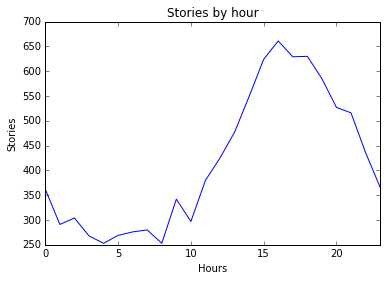

In [7]:
#which hour have the most post 
hour_chart = df['id'].groupby(df['post_hour']).count().plot(kind ='line', title ='Stories by hour')
hour_chart.set_xlabel('Hours')
hour_chart.set_ylabel('Stories')
fig3 = hour_chart.get_figure()
fig3.savefig('stories_hour_chart.png')

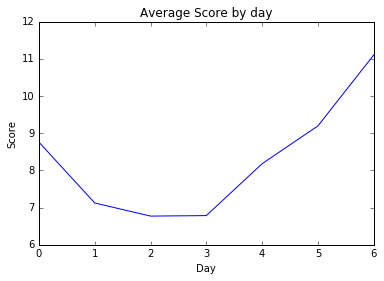

In [8]:
#which day have the highest score
day_chart = df['score'].groupby(df['post_day']).mean().plot(kind ='line', title ='Average Score by day')
day_chart.set_xlabel('Day') #0 for monday
day_chart.set_ylabel('Score')
fig3 = day_chart.get_figure()
fig3.savefig('score_day_chart.png')

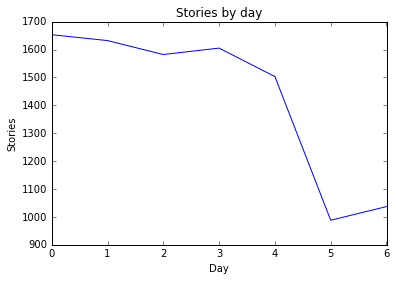

In [9]:
#which day have the most post 
day_chart = df['id'].groupby(df['post_day']).count().plot(kind ='line', title ='Stories by day')
day_chart.set_xlabel('Day') #0 for monday
day_chart.set_ylabel('Stories')
fig3 = day_chart.get_figure()
fig3.savefig('stories_day_chart.png')

In [35]:
df.score.describe()

count    10000.000000
mean         8.060200
std         31.833836
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        847.000000
Name: score, dtype: float64

Very skewed scores. 

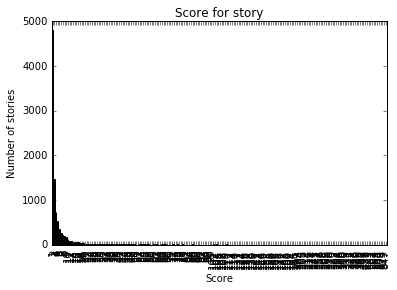

In [34]:
#groupby scores and count stories. check what is the most common score for a story
score_chart = df['id'].groupby(df['score']).count().plot(kind ='bar',title='Score for story')
score_chart.set_xlabel('Score')
score_chart.set_ylabel('Number of stories')
fig2 = score_chart.get_figure()
fig2.savefig('Score_stories.png')

In [39]:
#which authors consistently get on the front page
average_score = df['score'].groupby(df['by']).mean()
print "\n"
print 'Top 5 Authors base on mean score:' , average_score.sort_values(ascending = False).head(5) #top 5 author with highest score
print "\n"



Top 5 Authors base on mean score: by
wwwarsame          847.0
disappointeddev    679.0
conroy             592.0
tastyface          558.0
roflc0ptic         407.0
Name: score, dtype: float64




# Text analysis using Naive Bayes

In [10]:
#ngram text analysis on 10000 text. 
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(ngram_range=(1,2))
df_text = df[['score', 'text']].copy()
CV.fit(df_text['text'])
X = CV.transform(df_text['text'])
Y = df_text['score']

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, random_state =3)

def accuracy_report(_clf):
    training_accuracy = _clf.score(xtrain, ytrain)
    test_accuracy = _clf.score(xtest, ytest)
    print "Accuracy on test data: %0.2f%%" % (100 * test_accuracy)
    print "Accuracy on training data: %0.2f%%" % (100 * training_accuracy)

print '===Naive Bayes: Feature = text; Target = score.===\n'


from sklearn.naive_bayes import MultinomialNB
print "MultinomialNB:"
clf_m = MultinomialNB().fit(xtrain, ytrain)
accuracy_report(clf_m)

print "\n"

from sklearn.naive_bayes import BernoulliNB
print "BernoulliNB:"
clf_b = BernoulliNB().fit(xtrain, ytrain)
accuracy_report(clf_b)

print "\n"

from sklearn.linear_model import LogisticRegression
print "Logistic Regression:"
clf_lr = LogisticRegression().fit(xtrain, ytrain)
accuracy_report(clf_lr)


#find the most common words among highest score.

ImportError: No module named model_selection

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
print df.info()

X = df[[dead', 'descendants', 'post_hour','post_day', 'text_length']]
y = np.asarray(df.score, dtype ='|S6')


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
print knn.predict([[1,0,0,0,1,10,4]])

# KFOLD

In [ ]:
from sklearn.model_selection import KFold